## 🧪 Exploratory Data Analysis (EDA) – NYC Motor Vehicle Collisions
- This section provides a detailed analysis of motor vehicle collisions in New York City from 2020 to 2024. The objective is to explore patterns, trends, and relationships in the data that can inform policy, safety improvements, and predictive modeling.

### 📥 Load Cleaned Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid')
df = pd.read_csv("../data/cleaned_data/nyc_collisions_cleaned.csv")
df.shape


(337369, 22)

### 🔍 Dataset Overview

first inspect the structure and sample records in the dataset to understand its schema and get an idea of what fields are available for analysis.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337369 entries, 0 to 337368
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     337369 non-null  object 
 1   crash_time                     337369 non-null  object 
 2   borough                        337369 non-null  object 
 3   zip_code                       337369 non-null  object 
 4   latitude                       337369 non-null  float64
 5   longitude                      337369 non-null  float64
 6   on_street_name                 337369 non-null  object 
 7   number_of_persons_injured      337369 non-null  int64  
 8   number_of_persons_killed       337369 non-null  int64  
 9   number_of_pedestrians_injured  337369 non-null  int64  
 10  number_of_pedestrians_killed   337369 non-null  int64  
 11  number_of_cyclist_injured      337369 non-null  int64  
 12  number_of_cyclist_killed      

In [5]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,...,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,year,crash_datetime
0,01-01-2024,17:07,BROOKLYN,11207,40.665657,-73.888084,Unknown,0,0,0,...,0,0,0,Unspecified,Unspecified,4702082,Sedan,Unknown,2024,01-01-2024 17:07
1,01-01-2024,21:56,BROOKLYN,11207,40.666430,-73.882835,Unknown,2,0,0,...,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4692079,Sedan,Sedan,2024,01-01-2024 21:56
2,01-01-2024,06:00,QUEENS,11416,40.685920,-73.846924,97 AVENUE,0,0,0,...,0,0,0,Unspecified,Unspecified,4691952,Sedan,Unknown,2024,01-01-2024 06:00
3,01-01-2024,05:57,QUEENS,11434,40.672382,-73.785740,BAISLEY BOULEVARD,1,0,0,...,0,0,0,Unsafe Speed,Unspecified,4691606,E-Scooter,DELIVERY T,2024,01-01-2024 05:57
4,01-01-2024,02:00,BROOKLYN,11228,40.613680,-74.007150,15 AVENUE,0,0,0,...,0,0,0,Passing Too Closely,Unspecified,4691924,Sedan,Sedan,2024,01-01-2024 02:00


### 📊 Column-Wise Insights

| Column Name                    | Non-Null Count | What It Means                                                                 |
|-------------------------------|----------------|--------------------------------------------------------------------------------|
| `crash_date`                  | ✅ Full         | Date of the crash                                                              |
| `crash_time`                  | ✅ Full         | Time of the crash (HH:MM format)                                              |
| `borough`                     | ✅ Full         | NYC borough (e.g., Brooklyn, Manhattan)                                       |
| `zip_code`                    | ~67%            | ZIP code of crash location                                                    |
| `latitude`, `longitude`       | ~92%            | Coordinates of the crash location                                             |
| `on_street_name`              | ~73%            | Street name where the crash occurred                                          |
| `number_of_persons_injured`   | ✅ Full         | Total number of people injured in the crash                                   |
| `number_of_persons_killed`    | ✅ Full         | Total number of people killed in the crash                                    |
| `number_of_pedestrians_injured` | ✅ Full       | Pedestrians injured in the crash                                              |
| `number_of_cyclist_injured`   | ✅ Full         | Cyclists injured in the crash                                                 |
| `number_of_motorist_injured`  | ✅ Full         | Motorists injured in the crash                                                |
| `contributing_factor_vehicle_1` | ~99%          | Primary cause of the crash (e.g., Driver Inattention)                         |
| `vehicle_type_code1`          | ~99%            | Type of vehicle involved (e.g., Sedan, SUV, Taxi)                             |
| `year`, `crash_hour`, `day_of_week` | ✅ Derived | Time-related features created for modeling and analysis                       |


### Missing Value Summary

identify columns with missing values to plan further preprocessing or visual exclusion.


In [7]:
nulls = df.isnull().sum().reset_index()
nulls.columns = ['Column', 'Null Count']
nulls['% Missing'] = (nulls['Null Count'] / len(df) * 100).round(2)
nulls.sort_values(by='Null Count', ascending=False)


,Column,Null Count,% Missing
0,crash_date,0,0.0
1,crash_time,0,0.0
2,borough,0,0.0
3,zip_code,0,0.0
4,latitude,0,0.0
5,longitude,0,0.0
6,on_street_name,0,0.0
7,number_of_persons_injured,0,0.0
8,number_of_persons_killed,0,0.0
9,number_of_pedestrians_injured,0,0.0


### 🏙️ Borough-Wise Collision Count

**Why this plot?** 
 
To identify which NYC boroughs experience the most traffic collisions. This helps prioritize city planning and traffic enforcement in high-risk zones.


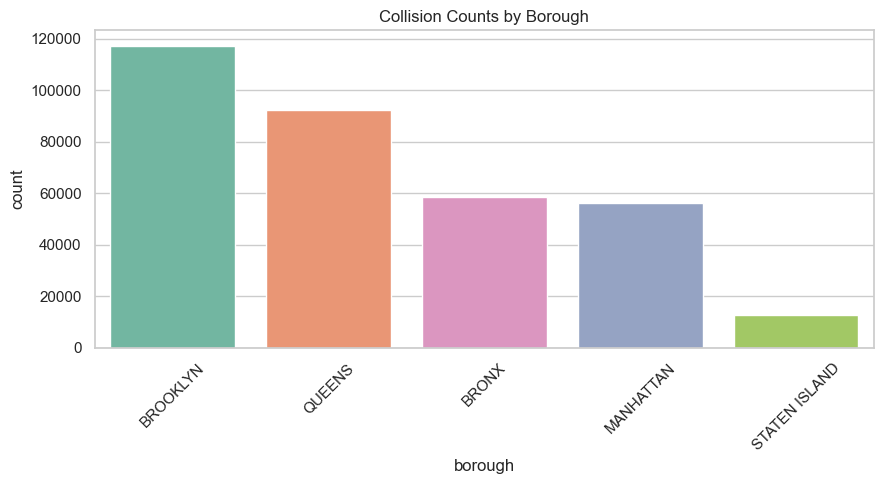

In [15]:
plt.figure(figsize=(9, 5))
sns.countplot(x="borough", data=df, order=df['borough'].value_counts().index, hue="borough", palette="Set2", legend=False)
plt.title("Collision Counts by Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**📝 Observation:**  
- **Brooklyn** shows the highest collision count.  
- **Staten Island** has the lowest — likely due to smaller population and less traffic density.


### 📆 Yearly Trend of Collisions

**Why this plot?**  

To assess how crash volume has changed annually from 2020 to 2024 — for example, pandemic impacts or policy shifts.



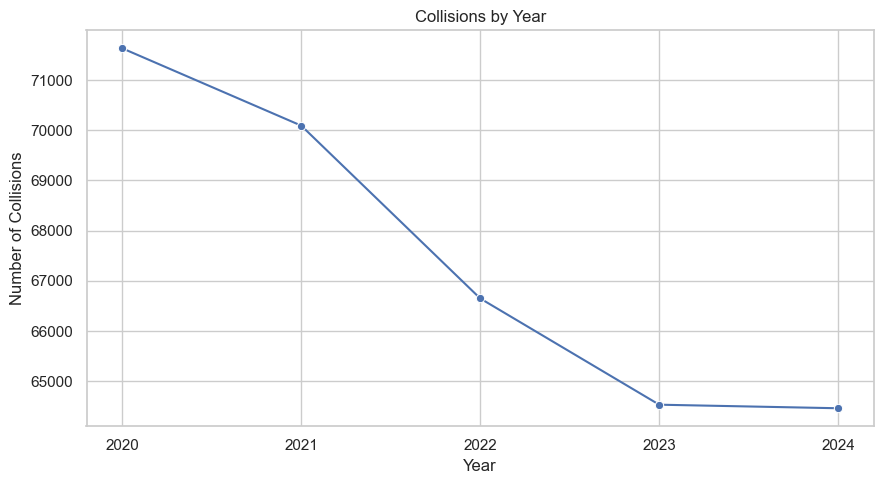

In [ ]:
# Prepare the yearly data
yearly = df["year"].value_counts().sort_index()
years = yearly.index.astype(int)
counts = yearly.values

# Plot
plt.figure(figsize=(9, 5))
sns.lineplot(x=years, y=counts, marker='o')
plt.title("Collisions by Year")
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.xticks(ticks=years, labels=years) 
plt.grid(True)
plt.tight_layout()
plt.show()


**📝 Observation:**

- Collisions have steadily decreased each year from 2020 to 2024.

- The most significant drop occurred between 2021 and 2022, with a continued slight decline through 2024.

### 🚑 Injury Distribution by Borough

**Why this plot?** 
 
Boxplots show median, range, and outliers of injuries in each borough.


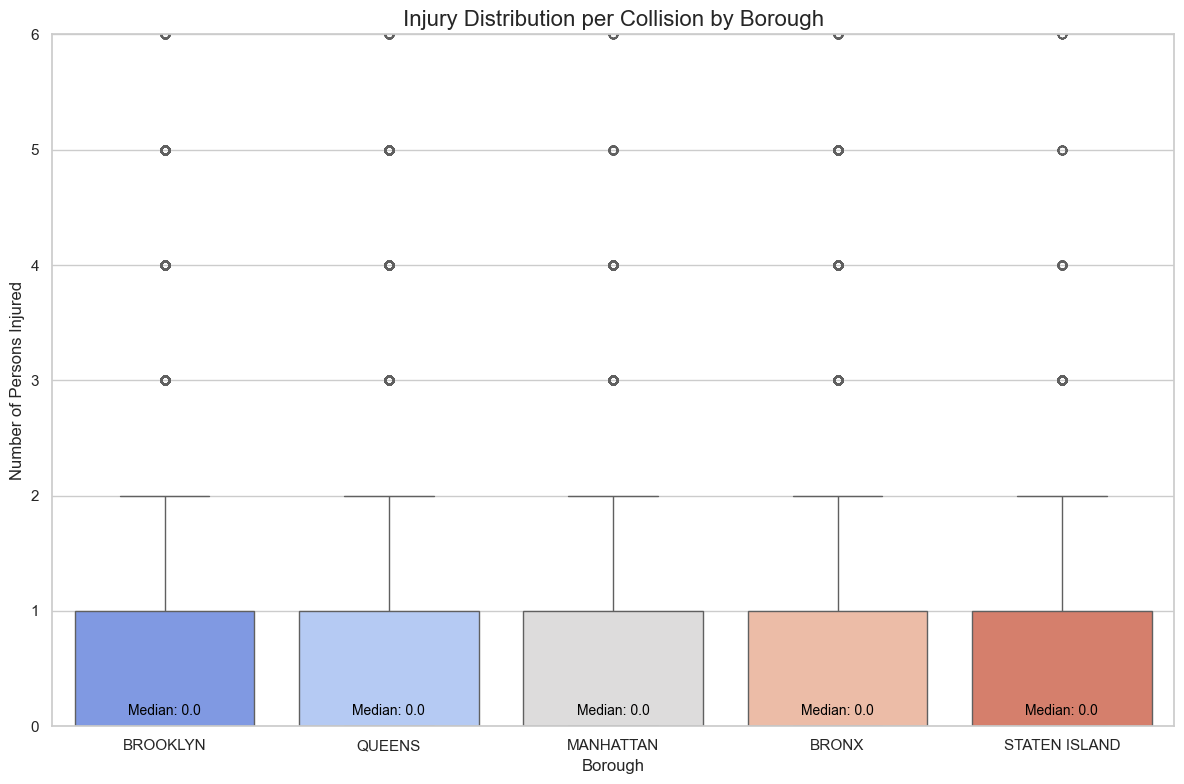

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df,
    x="borough",
    y="number_of_persons_injured",
    hue="borough",
    palette="coolwarm",
    legend=False
)

# Calculate medians for each borough
medians = df.groupby("borough")["number_of_persons_injured"].median()

# Add median labels
for idx, borough in enumerate(medians.index):
    plt.text(
        idx,
        medians[borough] + 0.1,  # slight vertical offset
        f"Median: {medians[borough]:.1f}",
        ha='center',
        fontsize=10,
        color='black'
    )

plt.title("Injury Distribution per Collision by Borough", fontsize=16)
plt.xlabel("Borough")
plt.ylabel("Number of Persons Injured")
plt.ylim(0, 6)
plt.tight_layout()
plt.show()


**📝 Observation:** 

- The boxplot reveals that the median number of persons injured per collision is 0.0 across all boroughs. This means over 50% of crashes result in no injuries.

- The interquartile range (IQR) is between 0 and 1, suggesting low severity for most incidents. However, the presence of multiple outliers indicates that some collisions still result in high injury counts, highlighting pockets of risk.

### 📊 Histogram of Number of Persons Injured

**Why this plot?** 

Shows the spread of injuries per incident — most are low severity.

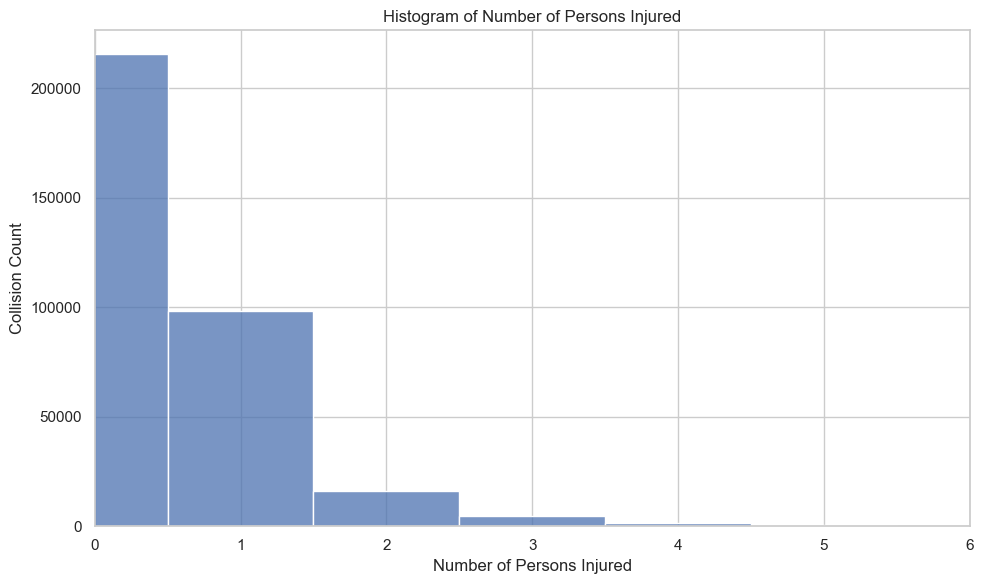

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="number_of_persons_injured", bins=range(0, 36), kde=False, discrete=True)
plt.title("Histogram of Number of Persons Injured")
plt.xlabel("Number of Persons Injured")
plt.ylabel("Collision Count")
plt.xlim(0, 6)
plt.tight_layout()
plt.show()

**📝 Observation:**  
- The vast majority of crashes result in **0 injuries**.
- A significant portion result in exactly **1 injury**.
- Injury counts greater than 3 are extremely rare and can be considered **outliers**.
- This confirms that **most NYC vehicle collisions are low-severity events**.

### ⏱️ Collisions by Hour of Day

**Why this plot?**  

Shows which hours are most accident-prone — often related to traffic rush hours.

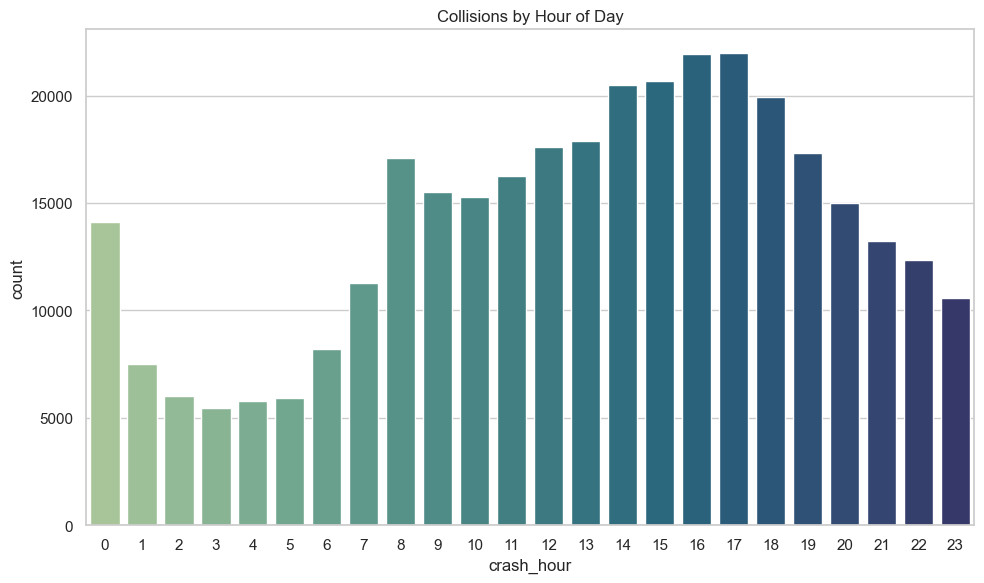

In [38]:
plt.figure(figsize=(10, 6))
df["crash_hour"] = pd.to_datetime(df["crash_time"], format="%H:%M", errors='coerce').dt.hour
sns.countplot(x="crash_hour", data=df, hue="crash_hour", palette="crest", legend=False)
plt.title("Collisions by Hour of Day")
plt.tight_layout()
plt.show()

**📝 Observation:**  
- Collisions peak during **rush hours (8–9 AM, 5–6 PM)**.  
- Early morning and late-night hours have the fewest incidents.

### 📅 Collisions by Day of Week

**Why this plot?** 
 
Identifies whether weekdays or weekends have higher crash rates.


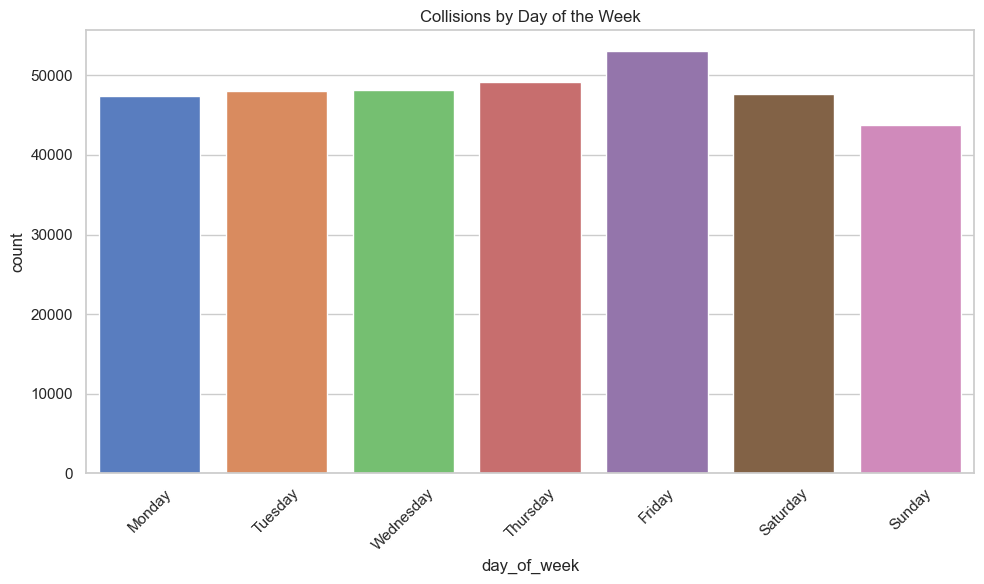

In [43]:
plt.figure(figsize=(10, 6))
df["crash_date"] = pd.to_datetime(df["crash_date"], format="%d-%m-%Y", errors="coerce")
df["day_of_week"] = df["crash_date"].dt.day_name()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x="day_of_week", data=df, order=dow_order, palette="muted",hue="day_of_week")
plt.title("Collisions by Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**📝 Observation:**  
- Fridays show the highest collision counts; weekends slightly lower.


### ⚠️ Contributing Factors

**Why this plot?**  

To identify the most common causes of vehicle crashes in NYC.

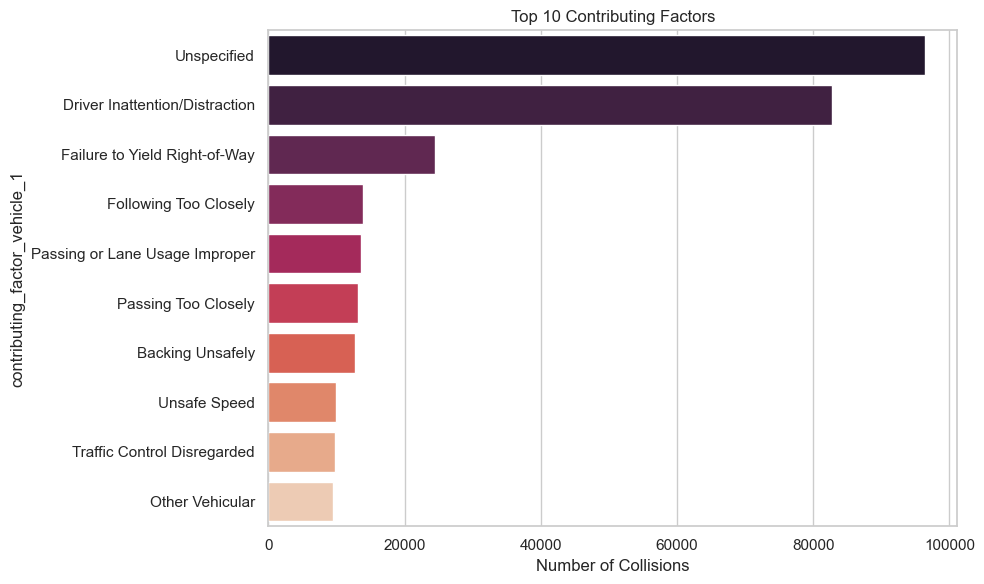

In [50]:
plt.figure(figsize=(10, 6))
top_factors = df['contributing_factor_vehicle_1'].value_counts().head(10)
sns.barplot(y=top_factors.index, x=top_factors.values, palette="rocket",hue= top_factors.index)
plt.title("Top 10 Contributing Factors")
plt.xlabel("Number of Collisions")
plt.tight_layout()
plt.show()

**📝 Observation:**  
- **Driver Inattention/Distraction** and **Failure to Yield** dominate the list.  
- Human error is the leading cause of most NYC crashes.

### 🚘 Vehicle Types Involved

**Why this plot?** 
 
This helps understand what kind of vehicles are most frequently involved in crashes.

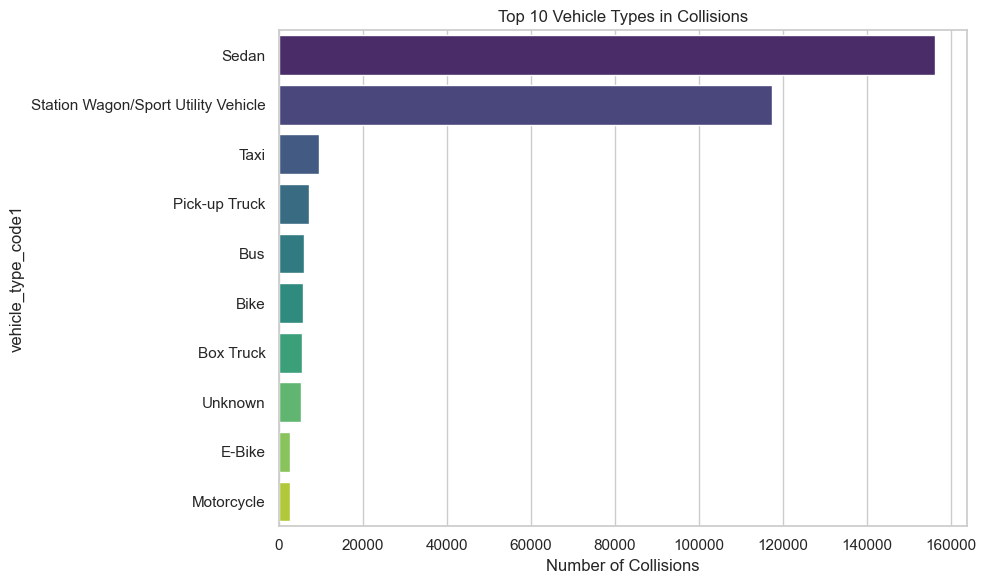

In [54]:
plt.figure(figsize=(10, 6))
top_vehicles = df['vehicle_type_code1'].value_counts().head(10)
sns.barplot(y=top_vehicles.index, x=top_vehicles.values, palette="viridis",hue=top_vehicles.index)
plt.title("Top 10 Vehicle Types in Collisions")
plt.xlabel("Number of Collisions")
plt.tight_layout()
plt.show()

**📝 Observation:**  
- **Sedans** and **station wagons** are involved in the majority of collisions.  


### 📈 Linear Relationship: Motorist Injured vs Total Injured (lmplot)

**Why this plot?**  

Use `lmplot` to visualize the linear relationship between **motorist injuries** and **total injuries** in a collision. This helps determine whether an increase in motorist injuries consistently correlates with total injuries — a valuable insight for predictive modeling.


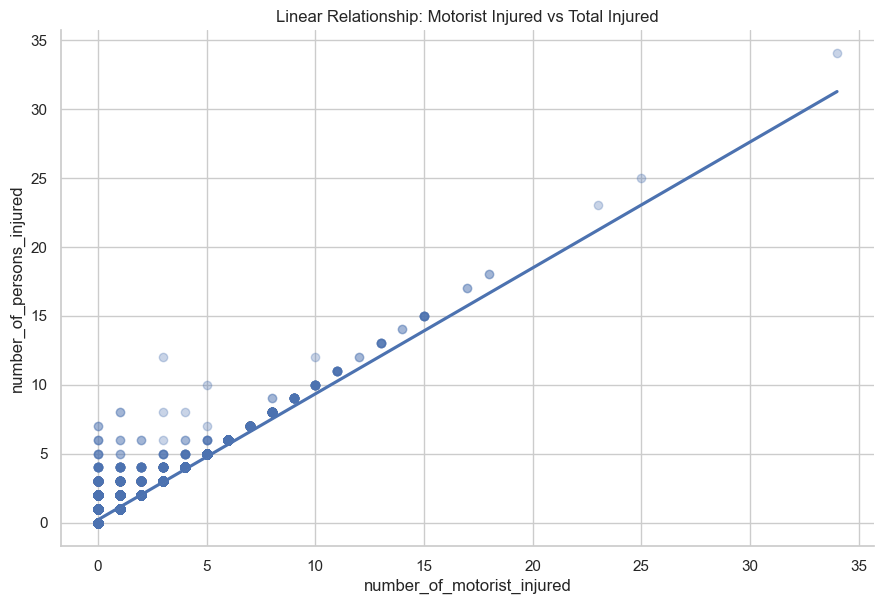

In [66]:
sns.lmplot(
    data=df,
    x="number_of_motorist_injured",
    y="number_of_persons_injured",
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.3}
)
plt.title("Linear Relationship: Motorist Injured vs Total Injured")
plt.show()


**📝 Observation:**  
- There's a strong positive trend — when more motorists are injured, the total injury count also increases.
- Most collisions cluster at low injury counts (0–2), with very few high-injury outliers.
- This confirms that motorist injuries are often the major component of total injuries.

### 🟣 Scatter Plot: Injuries vs Fatalities by Borough

**Why this plot?**  
A scatterplot helps examine whether there’s a pattern behavior between **injury count** and **fatality count**, broken down by borough. This highlights the **severity** of collisions and reveals borough-level differences in crash outcomes.

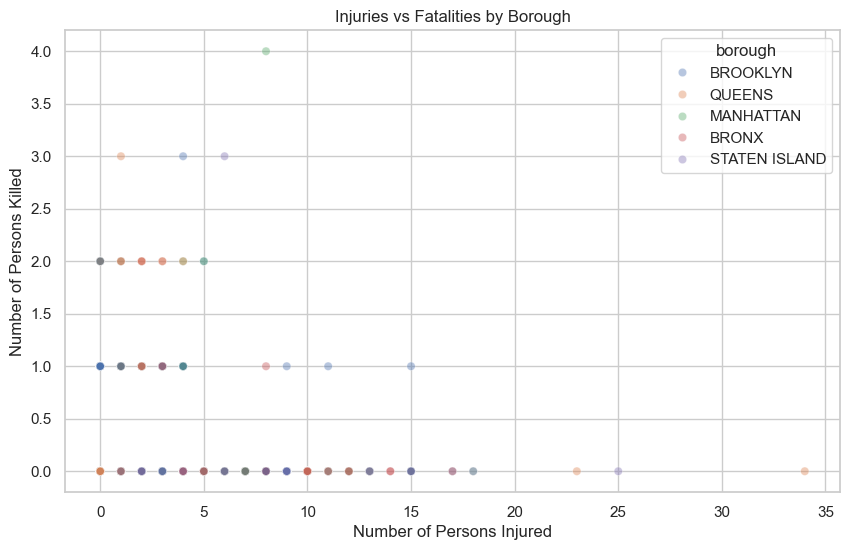

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="number_of_persons_injured",
    y="number_of_persons_killed",
    hue="borough",
    alpha=0.4
)
plt.title("Injuries vs Fatalities by Borough")
plt.xlabel("Number of Persons Injured")
plt.ylabel("Number of Persons Killed")
plt.show()


**📝 Observation:**  
- Most data points lie close to zero fatalities and injuries — indicating most crashes are minor.
- A few boroughs show slightly higher fatality outliers.
- Manhattan and Brooklyn have higher density of points due to more frequent collisions.


### 🥧 Pie Chart: Proportion of Collisions by Borough

**Why this plot?** 
 
A pie chart provides a high-level view of which boroughs contribute most to the total number of motor vehicle collisions. It's simple and ideal for reports, dashboards, and presentations.

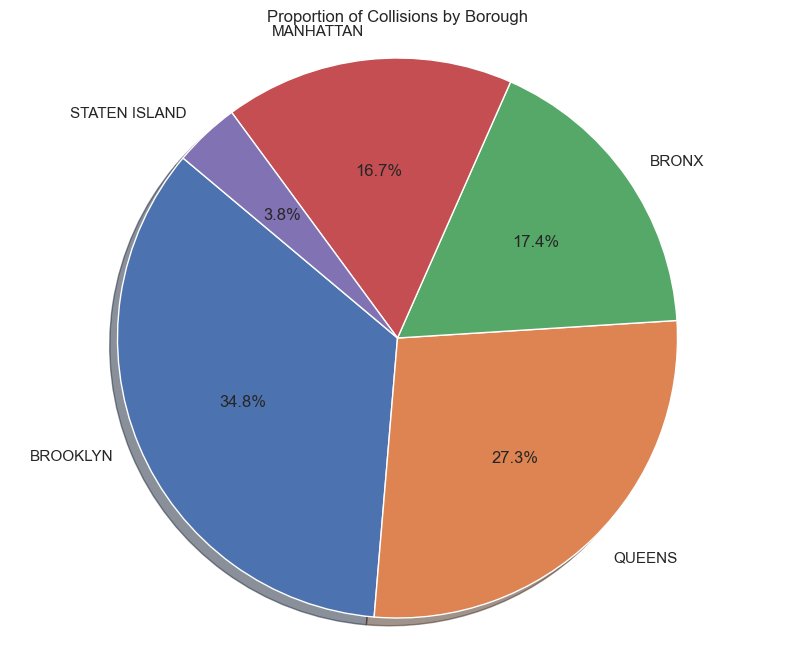

In [69]:
borough_counts = df['borough'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    borough_counts,
    labels=borough_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title("Proportion of Collisions by Borough")
plt.axis("equal")
plt.show()


**📝 Observation:**  
- **Brooklyn** and **Queens** dominate collision volume, consistent with their size and traffic load.
- **Staten Island** accounts for a very small percentage of crashes.

### 🔗 Correlation Heatmap

**Why this plot?**  

We check how numeric features correlate — helpful for modeling.

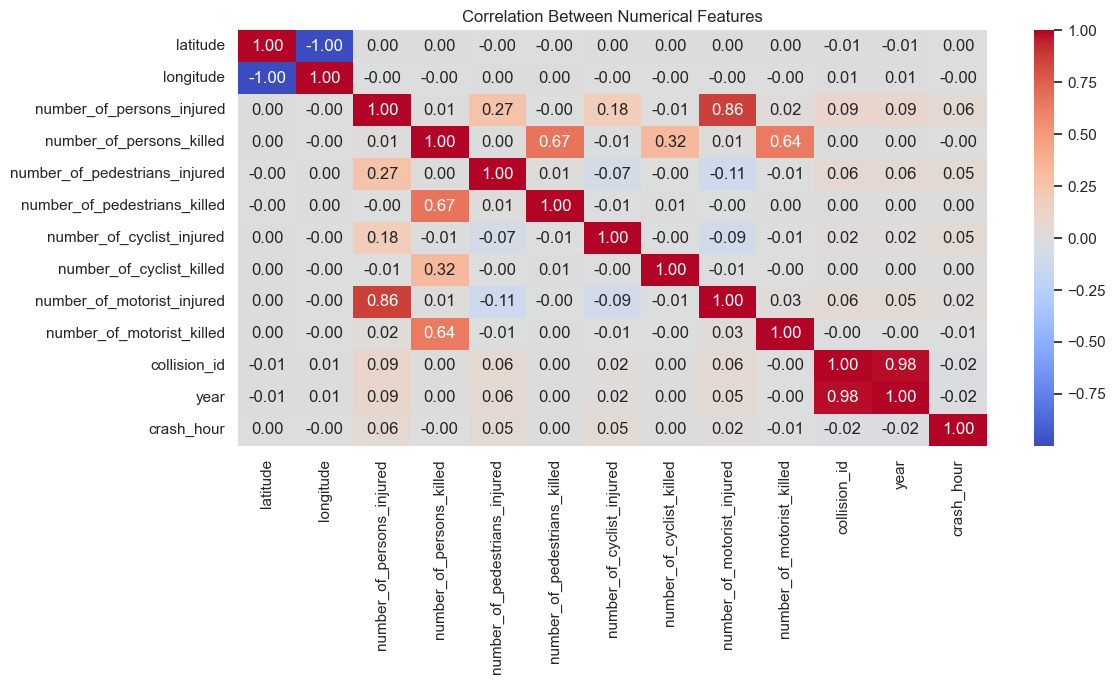

In [57]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()

**📝 Observation:**  
- There is strong positive correlation between `number_of_persons_injured` and other injury-related columns (e.g., motorist or pedestrian injuries).  
- Fatalities are less correlated with injury counts — likely due to their rarity.

### 🗺️ NYC Motor Vehicle Collisions: Geospatial Mapping

**Why this plot?**
  
Mapping collisions on a city map helps us visualize **geographic crash hotspots** across New York City. It gives insight into where accidents are most frequent and helps city planners target high-risk intersections or road segments.

In [ ]:
df_sample = df_map.sample(n=10000, random_state=42)  # adjust size

# Create the scatter map
fig = px.scatter_map(
    df_sample,
    lat="latitude",
    lon="longitude",
    hover_name="borough",
    hover_data={"number_of_persons_injured": True, "crash_date": True},
    zoom=10,
    height=600,
    width=1000,
    color_discrete_sequence=["crimson"]
)

# Use Mapbox open style
fig.update_layout(
    mapbox_style="open-street-map",
    title="🗺️ Motor Vehicle Collisions Across NYC",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


### 🔍 Summary of Key EDA Observations for ML Feature Planning

This section summarizes insights from the EDA that will shape your ML pipeline:

#### ✅ High-Value Predictors
- **Borough**: Clear differences in crash frequency — good categorical feature
- **Crash Hour & Day of Week**: Strong temporal patterns — useful for time-based predictions
- **Contributing Factors**: Textual reason for crash — potential for NLP transformation
- **Vehicle Type**: May help in segmenting crash severity (e.g., truck vs bicycle)

#### ❌ Dropped or Sparse Features
- `vehicle_type_code_3/4/5` and `contributing_factor_vehicle_3/4/5`: Dropped due to >95% missing
- `location`: Dropped due to redundancy with lat/lon

#### 🧠 Potential Targets for ML
- **number_of_persons_injured** (regression or classification severity buckets)
- **binary target** like `any_fatality` (created column) for classification


These will feed directly into feature prep and model design in the next step.
